<a href="https://colab.research.google.com/github/leonistor/ml-manning/blob/master/04-machine-learning/SupportVectorMachines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machines

In [0]:
import numpy as np
# create random data - sme as K-Means
# fake income/age for N people in k clusters
def createClusteredData(N, k):
  np.random.seed(1234)
  pointsPerCluster = float(N) / k
  X = [] # feature data
  y = [] # labels
  for i in range(k):
    incomeCentroid = np.random.uniform(20_000.0, 200_000.0)
    ageCentroid = np.random.uniform(20.0, 70.0)
    for j in range(int(pointsPerCluster)):
      X.append([
        np.random.normal(incomeCentroid, 10_000),
        np.random.normal(ageCentroid, 2.0)
      ])
      y.append(i)
  X = np.array(X)
  y = np.array(y)
  return X, y

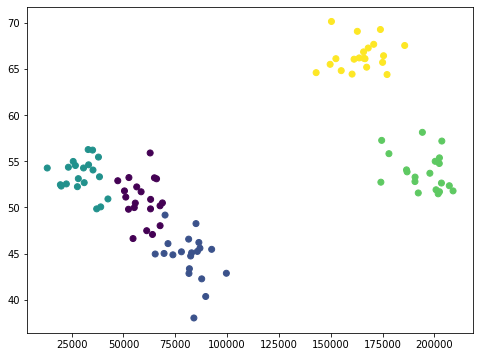

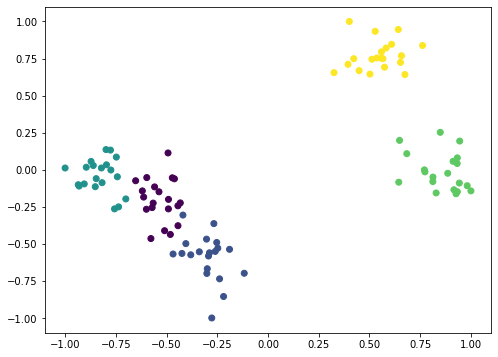

In [7]:
%matplotlib inline
from pylab import *
from sklearn.preprocessing import MinMaxScaler

(X, y) = createClusteredData(100, 5)

plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=y.astype(np.float))
plt.show()

scaling = MinMaxScaler(feature_range=(-1,1)).fit(X)
X = scaling.transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=y.astype(np.float))
plt.show()


In [0]:
from sklearn import svm, datasets

C = 1.0 # hyperparameter
svc = svm.SVC( kernel='linear', C=C).fit(X, y)
# svc = svm.SVC( kernel='rbf', C=C).fit(X, y)


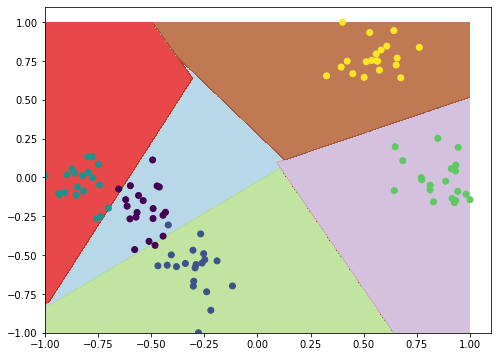

In [22]:
# plot results
def plotPredictions(clf):
  # create a dense grid of points to sample
  xx, yy = np.meshgrid(np.arange(-1, 1, .001), np.arange(-1, 1, .001))
  # convert to np arrays
  npx = xx.ravel()
  npy = yy.ravel()

  # convert tp a list of 2D (income, age) points
  samplePoints = np.c_[npx, npy]

  # generate predicted numbers (cluster number) fro each point
  Z = clf.predict(samplePoints)

  plt.figure(figsize=(8,6))
  # reshape results to match xx dimension
  Z = Z.reshape(xx.shape)
  # draw contour
  plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
  # draw the points
  plt.scatter(X[:,0], X[:,1], c=y.astype(np.float))
  plt.show()

plotPredictions(svc)